# Getting the Data

##### When our group came together to research "is data science a good career" we found a plethora of resources. Amongst those resources we found the governments department of labor and kaggle to house the main datasets for our research.

# Cleaning the Data

##### Generated map information using the google places API to find global coordinates


In [31]:
import requests
import json
# from config import google_places_key
import pandas as pd
import os

if not os.path.exists('Resources/manuel/map_information'):
    data = pd.read_csv('Resources/manuel/glassdoor_data_scientist_jobs.csv')
    sorted_cities = data["Location"].unique()

    url = 'https://maps.googleapis.com/maps/api/geocode/json?address='
    cities = []
    state = []
    long = []
    lat = []
    for x in sorted_cities:
        state.append(x[-2:])
        cities.append(x[:-4])
        payload = requests.get(f'{url}{str(x).replace(" ", "+")}&key={google_places_key}').json()
        long.append(payload['results'][0]['geometry']['location']['lng'])
        lat.append(payload['results'][0]['geometry']['location']['lat'])
        print(f'{x} added!')

    map_info = pd.DataFrame({
        "city": cities,
        "state": state,
        "long": long,
        "lat": lat
    })
    map_info.to_csv("Resources/map_information", index=False)



##### Cleaned the masterbook excel sheet with multiple spreadsheets into several .csv files. Those files are saved inside of the _breakdown directory

In [32]:
import pandas as pd
from os.path import exists
import os
pd.set_option('display.max_columns', None)

production = False
if production:
    path = '../../Resources/manuel/occupation_Masterbook.xlsx'
    if exists(path) and not exists('../../Resources/masterbook/'):
        os.mkdir('../../Resources/masterbook')
        xcl = pd.read_excel(path, sheet_name=None)
        for key in xcl.keys():
            xcl[key].to_csv('Resources/masterbook/{}.csv'.format(key), index=False)
            df = pd.read_csv('Resources/masterbook/{}.csv'.format(key))
            new_columns = []
            for x in df.columns:
                new_columns.append(df[x].iloc[0])
            df.columns = new_columns
            clean_df = df.iloc[1:]
            clean_df.to_csv('Resources/masterbook/{}.csv'.format(key), index=False)

    path = '../../Resources/manuel/Fastest_Growing_Occupations_2020.xlsx'
    if exists(path) and not exists('../../Resources/growing_occupation/'):
        os.mkdir('../../Resources/growing_occupation/')
        xcl = pd.read_excel(path, sheet_name=None)
        for key in xcl.keys():
            xcl[key].to_csv('Resources/growing_occupation/{}.csv'.format(key), index=False)
            df = pd.read_csv('Resources/growing_occupation/{}.csv'.format(key))
            new_columns = []
            for x in df.columns:
                new_columns.append(df[x].iloc[0])
            df.columns = new_columns
            clean_df = df.iloc[1:]
            clean_df.to_csv('Resources/growing_occupation/{}.csv'.format(key), index=False)


##### Cleaned each .csv file to include on the jobs that we found are usable for our analysis

In [33]:
import pandas as pd
import os
pd.set_option('display.max_columns', 2)

production = False
if production:
    ocupations = [
        '11-3021',
        '15-0000',
        '15-1211',
        '15-1221',
        '15-1231',
        '15-1241',
        '15-1245',
        '15-1251',
        '15-2098',
        '51-9161',
        '51-9162'
    ]
    if not os.path.exists('../../Resources/manuel/masterbook_breakdown'):
        counter = 0
        for file in os.listdir('../../Resources/masterbook'):
            df = pd.read_csv(f'Resources/masterbook/{file}')
            if counter == 0:
                pass
            else:
                occ_df = df.loc[
                    (df[df.columns[1]] == ocupations[0]) |
                    (df[df.columns[1]] == ocupations[1]) |
                    (df[df.columns[1]] == ocupations[2]) |
                    (df[df.columns[1]] == ocupations[3]) |
                    (df[df.columns[1]] == ocupations[4]) |
                    (df[df.columns[1]] == ocupations[5]) |
                    (df[df.columns[1]] == ocupations[6]) |
                    (df[df.columns[1]] == ocupations[7]) |
                    (df[df.columns[1]] == ocupations[8]) |
                    (df[df.columns[1]] == ocupations[9]) |
                    (df[df.columns[1]] == ocupations[10])
                ]
                if not os.path.exists('../../Resources/manuel/masterbook_breakdown/'):
                    os.mkdir('../../Resources/manuel/masterbook_breakdown/')
                if not len(occ_df) == 0:
                    occ_df.to_csv(f'Resources/masterbook_breakdown/{file}', index=False)
            counter += 1
    if not os.path.exists('../../Resources/manuel/growing_occupation_breakdown'):
        counter = 0
        for file in os.listdir('../../Resources/growing_occupation'):
            df = pd.read_csv(f'Resources/growing_occupation/{file}')
            if counter == 0:
                pass
            else:
                occ_df = df.loc[
                    (df[df.columns[1]] == ocupations[0]) |
                    (df[df.columns[1]] == ocupations[1]) |
                    (df[df.columns[1]] == ocupations[2]) |
                    (df[df.columns[1]] == ocupations[3]) |
                    (df[df.columns[1]] == ocupations[4]) |
                    (df[df.columns[1]] == ocupations[5]) |
                    (df[df.columns[1]] == ocupations[6]) |
                    (df[df.columns[1]] == ocupations[7]) |
                    (df[df.columns[1]] == ocupations[8]) |
                    (df[df.columns[1]] == ocupations[9]) |
                    (df[df.columns[1]] == ocupations[10])
                ]
                if not os.path.exists('../../Resources/manuel/growing_occupation_breakdown/'):
                    os.mkdir('../../Resources/manuel/growing_occupation_breakdown/')
                if not len(occ_df) == 0:
                    occ_df.to_csv(f'Resources/growing_occupation_breakdown/{file}', index=False)
            counter += 1


##### Then made every posssible bar chart combination with the .csv files. As a group we decided which ones we wanted to use for our final analysis.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

production = False
if production:
    masterbook_dfs = [
        pd.read_csv(f'Resources/masterbook_breakdown/{file}')
        for file in os.listdir('../../Resources/manuel/masterbook_breakdown')
    ]

    growing_occ_df = [
        pd.read_csv(f'Resources/growing_occupation_breakdown/{file}')
        for file in os.listdir('../../Resources/manuel/growing_occupation_breakdown')
    ]

    # Read the .csv with Employment Information
    job_stats_df = masterbook_dfs[1]
    print(job_stats_df.columns)
    # Update the column names for greater legibility
    columns = []
    for x in job_stats_df.columns:
        if x == 'Occupation\ntype':
            columns.append("Occupation Type")
        else:
            columns.append(x)
    job_stats_df.columns = columns

    if not os.path.exists('../../Resources/manuel/graphs/'):
        os.mkdir('../../Resources/manuel/graphs/')
        counter = 0
        for x in range(len(job_stats_df.columns)):
            for y in range(len(job_stats_df.columns)):
                x_axis = job_stats_df[job_stats_df.columns[x]]
                y_axis = job_stats_df[job_stats_df.columns[y]]
                title = f'{job_stats_df.columns[x]} vs. {job_stats_df.columns[y]}'
                plt.figure(counter)
                plt.bar(x_axis, y_axis)
                plt.xlabel(job_stats_df.columns[x])
                plt.ylabel(job_stats_df.columns[y])
                plt.title(title)
                plt.xticks(rotation=90)
                plt.savefig(f'Resources/graphs/{title}.png')
                plt.close(counter)
                counter += 1


##### Looking at table_1.2 in the masterbook, we found the jobs with the matching job titles we wanted in order to find the best annual salary, education required, and work experience

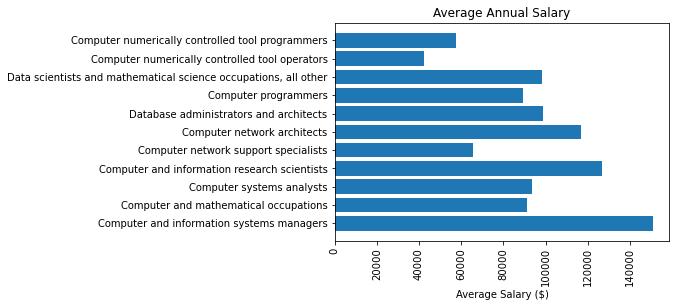

<Figure size 432x288 with 0 Axes>

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy
import matplotlib.style
%matplotlib inline
table_2_path = "Resources/Table_2.csv"
table_2_df = pd.read_csv(table_2_path)
table_2_df
df = table_2_df.loc[
    (table_2_df["2020 National Employment Matrix title"] == "Data scientists and mathematical science occupations, all other") | 
    (table_2_df["2020 National Employment Matrix title"] == "Database administrators and architects") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer and information research scientists") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer and information systems managers") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer and mathematical occupations") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer network architects") | 
    (table_2_df["2020 National Employment Matrix title"] == "Computer network support specialists") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer numerically controlled tool operators") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer numerically controlled tool programmers") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer programmers") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer systems analysts") |
    (table_2_df["2020 National Employment Matrix title"] == "Data scientists and mathematical science occupations, all other") |
    (table_2_df["2020 National Employment Matrix title"] == "Database administrators and architects") 
]
df = df.astype({"2020 National Employment Matrix title": str, "Median annual wage 2020": float})
df

stat = df['Median annual wage 2020']
stat = stat.astype({"Median annual wage 2020": int})
pd.set_option("display.precision", 0)
stat_df = pd.DataFrame({"Median annual wage 2020" : stat})
stat_df['Median annual wage 2020'].describe()

col = df[['2020 National Employment Matrix title','Median annual wage 2020']]
col = col.astype({"2020 National Employment Matrix title": str, "Median annual wage 2020": float})
col

set_x = col["2020 National Employment Matrix title"]
set_y = col["Median annual wage 2020"]

#Establish dataframe with the values
plt.barh(set_x, set_y)

#Chart editing
plt.title("Average Annual Salary")
plt.xticks(rotation=90)
plt.xlabel("Average Salary ($)") 
plt.show()
plt.savefig("average_annual_salary.png")

df1 = table_2_df.loc[
    (table_2_df["2020 National Employment Matrix title"] == "Data scientists and mathematical science occupations, all other") | 
    (table_2_df["2020 National Employment Matrix title"] == "Database administrators and architects") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer and information research scientists") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer and information systems managers") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer network architects") | 
    (table_2_df["2020 National Employment Matrix title"] == "Computer network support specialists") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer numerically controlled tool operators") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer numerically controlled tool programmers") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer programmers") |
    (table_2_df["2020 National Employment Matrix title"] == "Computer systems analysts") |
    (table_2_df["2020 National Employment Matrix title"] == "Data scientists and mathematical science occupations, all other") |
    (table_2_df["2020 National Employment Matrix title"] == "Database administrators and architects") 
]

degree = df1.groupby("Typical education needed for entry")
degree_count = degree["Median annual wage 2020"].count()

NameError: name 'pie1' is not defined

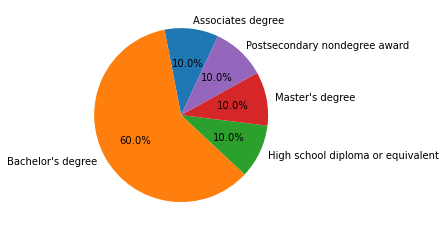

In [45]:
labels = ["Associates degree", "Bachelor's degree", "High school diploma or equivalent" , "Master's degree", "Postsecondary nondegree award"]
plt.pie(degree_count, labels=labels, autopct='%1.1f%%', startangle=65)
pie1.axis('equal')
plt.title("Typical Education Required")
plt.show()
plt.savefig("education_required.png")

Work experience in a related occupation
5 years or more    2
None               8
Name: Work experience in a related occupation, dtype: int64


NameError: name 'pie1' is not defined

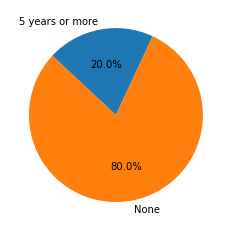

In [46]:
work_experience = df1.groupby("Work experience in a related occupation")
wexp_count = work_experience["Work experience in a related occupation"].count()
print(wexp_count)

labels = ["5 years or more", "None"]
plt.pie(wexp_count, labels=labels, autopct='%1.1f%%', startangle=65)
pie1.axis('equal')
plt.title("Typical Work Experience Required")
plt.show()
plt.savefig("work_experience.png")

##### Cleaned up a kaggle dataset dedicated to data scientist jobs

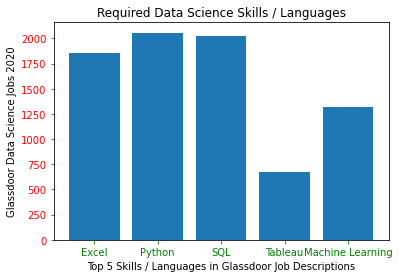

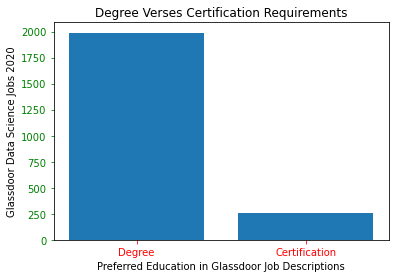

In [58]:
### Glassdoor Data Scientist Job Data 

# import modules
import pandas as pd
import os
import scipy.stats as st
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)# load dataset
glassdoor = pd.read_csv("Resources/glassdoor/glassdoor_data_scientist_jobs.csv")

# remove unneeded columns
glassdoor.drop('Unnamed: 0', axis=1, inplace=True)
glassdoor.drop('index', axis=1, inplace=True)
glassdoor.drop('Salary Estimate', axis=1, inplace=True)
glassdoor.drop('Rating', axis=1, inplace=True)
glassdoor.drop('Company Name', axis=1, inplace=True)
glassdoor.drop('Location', axis=1, inplace=True)
glassdoor.drop('Headquarters', axis=1, inplace=True)
glassdoor.drop('Size', axis=1, inplace=True)
glassdoor.drop('Founded', axis=1, inplace=True)
glassdoor.drop('Type of ownership', axis=1, inplace=True)
glassdoor.drop('Revenue', axis=1, inplace=True)
glassdoor.drop('Competitors', axis=1, inplace=True)
glassdoor.drop('Easy Apply', axis=1, inplace=True)
glassdoor.drop('Industry', axis=1, inplace=True)
glassdoor.drop('Sector', axis=1, inplace=True)
glassdoor.head()

job_title_df = glassdoor.loc[
    (glassdoor["Job Description"].str.contains("Excel", case=False)) |
    (glassdoor["Job Description"].str.contains("Python", case=False)) |
    (glassdoor["Job Description"].str.contains("SQL", case=False)) |
    (glassdoor["Job Description"].str.contains("Tableau", case=False)) |
    (glassdoor["Job Description"].str.contains("Machine Learning", case=False))
]
glassdoor_clean = job_title_df


# job title types
job_title = glassdoor["Job Title"].value_counts()
job_title = job_title[:20]
job_title

# create bar graph for jobs with relevant job skills
keywords = [
    "Excel",
    "Python",
    "SQL",
    "Tableau",
    "Machine Learning"
]

x_axis = keywords
y_axis = []

for keyword in keywords:
    key_word_df = job_title_df.loc[job_title_df["Job Description"].str.contains(keyword, case=False)]
    number_of_values = len(key_word_df)
    y_axis.append(number_of_values)
    
plt.bar(x_axis, y_axis)
plt.xlabel("Top 5 Skills / Languages in Glassdoor Job Descriptions")
plt.ylabel("Glassdoor Data Science Jobs 2020")
plt.title("Required Data Science Skills / Languages")

# set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='red')

plt.show()

# search for code language keyword "Entry"
glassdoor_clean.loc[glassdoor_clean["Job Description"].str.contains("Entry", case=False)]

# search for code language keyword "Certification"
glassdoor_clean.loc[glassdoor_clean["Job Description"].str.contains("Certification", case=False)]

# search for code language keyword "Degree"
glassdoor_clean.loc[glassdoor_clean["Job Description"].str.contains("Degree", case=False)]

# create bar graph for degree vs certification
keywords = [
    "Degree",
    "Certification"
]
  
x_axis = keywords
y_axis = []

for keyword in keywords:
    key_word_df = job_title_df.loc[job_title_df["Job Description"].str.contains(keyword, case=False)]
    number_of_values = len(key_word_df)
    y_axis.append(number_of_values)
    
plt.bar(x_axis, y_axis)
plt.xlabel("Preferred Education in Glassdoor Job Descriptions")
plt.ylabel("Glassdoor Data Science Jobs 2020")
plt.title("Degree Verses Certification Requirements")

# set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='green')

# Analyzing the Data